## 信号处理之频谱原理与python实现


EEG信号是大脑神经元电活动的直接反应，包含着丰富的信息，但EEG信号幅值小，其中又混杂有噪声干扰，如何从EEG信号中抽取我们所感兴趣的信号是一个极为重要的问题。自1932年Dietch首先提出用傅里叶变换方法来分析EEG信号，该领域相继引入了频域分析、时域分析等脑电分析的经典方法。

### 频谱分析

频谱分析是一种将复噪声号分解为较简单信号的技术。真实世界中的信号可能由多种简单信号叠加而成。找出一个信号在不同频率下的信息（可能是幅度、功率、强度或相位等）的作法就是频谱分析。

#### 采样定理：采样频率要大于信号频率的两倍。

N个采样点经过FFT变换后得到N个点的以复数形式记录的FFT结果。

假设采样频率为$F_s$，采样点数为N。那么FFT运算的结果就是N个复数（或N个点），每一个复数就对应着一个频率值以及该频率信号的幅值和相位。

第一个点对应的频率为0Hz（即直流分量），最后一个点N的下一个点对应采样频率$F_s$。其中任意一个采样点n所代表的信号频率：

$$
F_n = (n-1) * F_s/N
$$

这表明，频谱分析得到的信号频率最大为 (N-1)*$F_s$/N,对频率的分辨能力是$F_s$/N。采样频率和采样时间制约着通过FFT运算能分析得到的信号频率上限，同时也限定了分析得到的信号频率的分辨率。

每一个复数的模值对应该点所对应的频率值的幅度特性，具体的定量关系如下：

假设信号由以下周期的原始信号叠加而成：

$$
 y=a_1 +a_2 cos(2\pi f_2 t +\phi_2*\pi/180) + a_3 cos(2\pi  f_3  t +\phi_3*\pi/180)
$$

那么，在经过FFT分析后得到的第一个点的模值是$a_1$的N倍，而且只有在FFT结果点对应的频率在$f_2$,$f_3$时，其模值才明显放大，在其他频率点，模值接近于0。在这些模值明显放大的点中，除第一个点之外的其它点模值是相应信号幅值的N/2倍。

每个复数的相位就是在该频率值下信号的相位：$\phi_2$，$\phi_3$。

FFT结果有对称性，通常我们只是用前半部分的结果，也就是小于采样频率一半的结果。同时也只有采样频率一半以内、具有一定幅值的信号频率才是真正的信号频率。

#### 下面是一组用于描述和解释信号属性的常用量

x: 采样的数据；

n=length(x): 样本数量；

fs: 采样频率(每单位时间或空间的样本数)(单位常用:赫兹Hz)；

dt=1/fs ：每样本的时间或空间增量(如果是时间上的增量，则又称：采样间隔或采样步长，单位常用:s)；

t=(0:n-1)/fs ： 数据的时间或空间范围；

y=fft(x) ： 数据的离散傅里叶变换(DFT)；

abs(y) ：DFT的振幅；

(abs(y).^2)/n ：DFT的幂；

fs/n ： 频率增量；

f=(0:n-1) * (fs/n) ： 频率范围；

fs/2 ：Nyquist频率(频率范围的中点)；

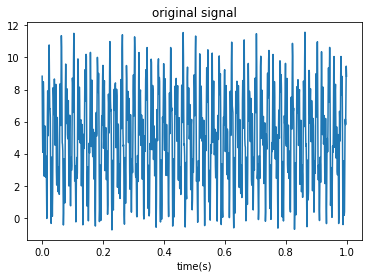

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math

# 采样频率
fs=1048
# 采样步长
#t = [x/1048.0 for x in range(1048)] 
t = np.linspace(0,1,fs)
"""
设计的采样值
假设信号y由4个周期信号叠加所得,如下所示
"""
y = 5 + 3.0 * np.cos(2.0 * np.pi * 50 * t - np.pi * 30/180)    \
      + 1.5 * np.cos(2.0 * np.pi * 75 * t + np.pi * 90/180)    \
      +  1.0 * np.cos(2.0 * np.pi * 150 * t + np.pi * 120/180) \
      +  2.0 * np.cos(2.0 * np.pi * 220 * t + np.pi * 30/180)

plt.plot(t,y)
plt.xlabel('time(s)')
plt.title("original signal")
plt.show()

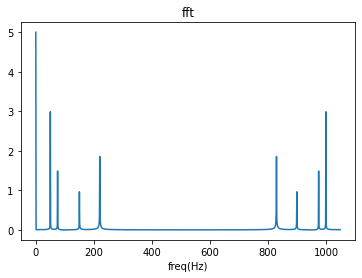

In [36]:
"""
现在对上述信号y在0-1秒时间内进行频谱分析，

本案例中采样频率为1048Hz,即单位时间内采样点数为1048
"""
# 采样点数
N=len(t)
f = np.linspace(0,fs,N)
yf = np.fft.fft(y)
Y = yf*2/N  #*2/N 反映了FFT变换的结果与实际信号幅值之间的关系
Y[0] /=2 # 直流成分
absY = np.abs(Y)      #求傅里叶变换结果的模
angleY = np.angle(Y)*180/(2*np.pi) 
pl.plot(f,absY)
pl.xlabel('freq(Hz)')
pl.title("fft")
pl.show()

In [35]:
f[500]

500.4775549188156

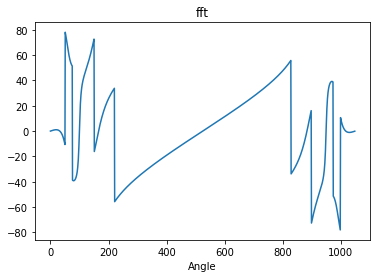

In [31]:
pl.plot(f,angleY)
pl.xlabel('Angle')
pl.title("fft")
pl.show()

In [3]:
fh = f[:len(f)//2]
absYh = absY[:len(absY)//2]

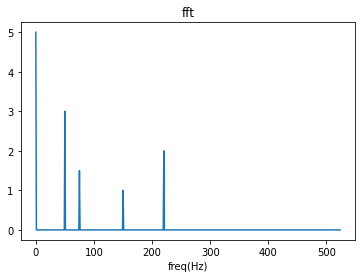

In [4]:
pl.plot(fh,absYh)
pl.xlabel('freq(Hz)')
pl.title("fft")
pl.show()

#### 傅里叶逆变换

In [5]:
yifft = np.fft.ifft(yf)

In [6]:
yifft

array([8.83012702-1.22124533e-15j, 5.74718123+2.60208521e-15j,
       4.08668792-1.11022302e-15j, ..., 5.81315353-1.88737914e-15j,
       7.39507574+5.38458167e-15j, 9.45819199+5.08967868e-15j])

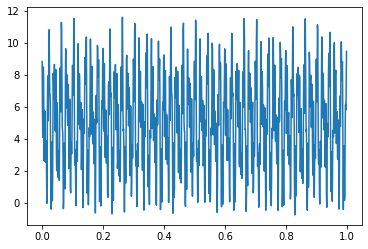

In [15]:
pl.plot(t,np.real(yifft))